In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
import sklearn.neighbors

X_train = np.load('/kaggle/input/intent-detection/X_train.npy')
X_test = np.load('/kaggle/input/intent-detection/X_test.npy')
Y_train = pd.read_csv('/kaggle/input/intent-detection/y_train.csv').Predicted.to_numpy()

**EDA**

In [2]:
X_train.shape

(1663, 768)

In [3]:
Y_train.shape

(1663,)

In [4]:
X_test.shape

(713, 768)

**768 features; 1663 labels; 713 test data points**

In [5]:
feat_col = [f'feat{i}' for i in range(X_test.shape[1])]
X_train_df = pd.DataFrame(X_train, columns = feat_col)
Y_train_df = pd.DataFrame(Y_train,columns = ["Target"])
XY_train_df = pd.concat([X_train_df, Y_train_df],axis = 1)
X_test_df = pd.DataFrame(X_test, columns=feat_col)

In [6]:
XY_train_df.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat759,feat760,feat761,feat762,feat763,feat764,feat765,feat766,feat767,Target
0,-0.064713,0.020554,-0.069173,-0.028174,-0.063835,-0.054158,-0.056317,0.001036,-0.038301,-0.027957,...,-0.049167,-0.019388,-0.045488,-0.051312,-0.022920,-0.034919,-0.020073,-0.052884,0.023714,8
1,-0.006381,0.007817,-0.022947,0.039866,-0.052437,0.011669,-0.051878,-0.026330,0.040994,-0.052231,...,0.014502,0.007691,-0.025002,-0.004711,0.003568,-0.010177,-0.066476,-0.012160,0.017803,44
2,0.003579,-0.009228,-0.062796,0.021353,-0.067594,-0.019499,0.029121,-0.013298,0.009264,-0.037961,...,0.038328,-0.005684,-0.033541,0.020269,-0.022111,-0.066562,0.012762,0.018555,0.002605,11
3,-0.043724,-0.011425,-0.051950,0.014659,-0.046709,-0.002156,-0.033904,0.004498,0.044775,-0.030488,...,-0.036184,-0.055876,0.012600,-0.016588,0.053944,-0.066483,-0.008629,-0.001444,0.025507,24
4,-0.019088,0.067039,-0.032487,-0.037979,0.014185,-0.007818,-0.059850,0.012668,-0.032715,0.009354,...,-0.065700,-0.043206,0.047978,-0.050414,0.024116,-0.046814,-0.002983,0.050728,0.038645,5


In [7]:
XY_train_df.info()
#Training dataset are all floats, Target variable are ints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Columns: 769 entries, feat0 to Target
dtypes: float32(768), int64(1)
memory usage: 4.9 MB


In [8]:
XY_train_df.isnull().sum().sum()
#0 null values in all of training dataset

0

In [9]:
XY_train_df.duplicated().sum()
#31 duplicated rows in training dataset

31

In [10]:
XY_train_df_transformed = XY_train_df.drop_duplicates()

In [11]:
X_test_df_transformed = X_test_df.drop_duplicates()

In [12]:
import umap
import matplotlib.pyplot as plt
reducer = umap.UMAP(n_neighbors = 50)

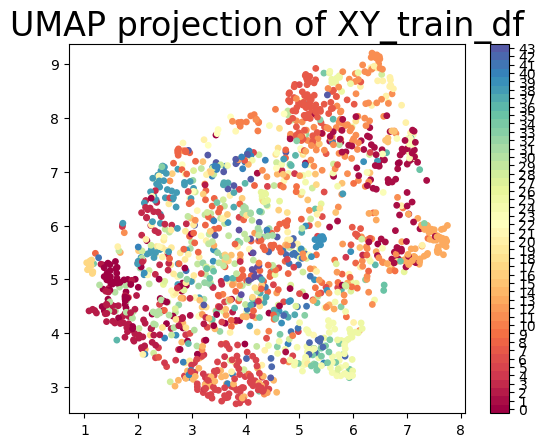

In [13]:
embedding = reducer.fit_transform(XY_train_df.iloc[:,:-1])

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c= XY_train_df.iloc[:,-1],
    cmap = 'Spectral', s= 15
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of XY_train_df', fontsize=24);
plt.colorbar(boundaries=np.arange(45)-0.5).set_ticks(np.arange(44))

In [14]:
outlier_scores = sklearn.neighbors.LocalOutlierFactor(novelty=False).fit_predict(embedding)

In [15]:
outlying_digits = XY_train_df[outlier_scores == -1]
outlying_digits.shape

(1, 769)

In [16]:
XY_train_df.loc[:, XY_train_df.columns == 'Target']

,Target
0,8
1,44
2,11
3,24
4,5
...,...
1658,20
1659,8
1660,34
1661,37


In [17]:
# random forests and gradient boosting classifier 